## House prediction dataset

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

The dataset contains house sale prices for King County, which includes Seattle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
df = pd.read_csv('../data/kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

## Linear Regression
A method to ehlp us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (Y)

The result of a linear regression is a function taht predicts the response variable as a function of the predictor

$
\widehat{Y} = a +bX
$

- `a` refers to the `intercept` of the line
- `b` refers to the `slope` of the line

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Create linear regression object
lm = LinearRegression()
lm

LinearRegression()

### How could the `sqft_living` help us predict the house price?

In [6]:
X = df[['sqft_living']] # This needs to be a 2D array
Y = df['price'] # This can be 1D

In [7]:
lm.fit(X, Y)

LinearRegression()

In [8]:
# Get the output prediction using X
Yhat = lm.predict(X)
# Print first 5 results
Yhat[:5]

array([287555.06702452, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [9]:
# Get the value of the intercept (a)
lm.intercept_

-43580.74309447361

In [10]:
# Get the value of the slope (b)
lm.coef_

array([280.6235679])

Final estimated linear model

$
\widehat{Y} = a + bX
$

In our case:
$
price = -43580.74 + 280.62356X
$

In [11]:
Yhat = 43580.74 + 280.62356*X
print(f'Using X price = {Yhat}')
# or using price
price = -43580.74 + 280.62356*df['sqft_living']
print(f'Using price = {price}')

Using X price =        sqft_living
0      374716.5408
1      764783.2892
2      259660.8812
3      593602.9176
4      515028.3208
...            ...
21608  472934.7868
21609  691821.1636
21610  329816.7712
21611  492578.4360
21612  329816.7712

[21613 rows x 1 columns]
Using price = 0        287555.0608
1        677621.8092
2        172499.4012
3        506441.4376
4        427866.8408
            ...     
21608    385773.3068
21609    604659.6836
21610    242655.2912
21611    405416.9560
21612    242655.2912
Name: sqft_living, Length: 21613, dtype: float64


## Task 1
Repeat process (LInear Model Prediction) but using `bedrooms` as the independent variable and `price` as your dependent variable

In [12]:
X = df[['bedrooms']]  # 2d
Y = df['price']  # id
lm2 = LinearRegression()
lm2.fit(X, Y)
lm2

LinearRegression()

In [13]:
lm2.intercept_

129802.35631825973

In [14]:

# find the slope(b) and intercept (a)
lm2.coef_

array([121716.12651184])

In [15]:
# Equation
Yhat = 129802.35 + 121716.1265*X
Yhat

,bedrooms
0,494950.7295
1,494950.7295
2,373234.6030
3,616666.8560
4,494950.7295
...,...
21608,494950.7295
21609,616666.8560
21610,373234.6030
21611,494950.7295


## Multiple Linear Regression
If you want to use more variables in the model to predict the price, then use a `multiple linear regression`

$
\widehat{Y} = a + b_{1}X_{1} + b_{2}X_{2} = b_{3}X_{3} ... b_{n}X_{n}
$

For this example good predictors of price will be:
- sqft_living
- bedrooms
- bathrooms
- sqft_lot

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load data
df = pd.read_csv('../data/kc_house_data.csv')

In [17]:
# Get tall the predictor variables
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']] #2D
Y = df['price']

In [18]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [19]:
# Get the intercept (a)
a = lm.intercept_

In [20]:
# Get the slopes b1, b2, b3, b4
bs = list(lm.coef_)
bs

[314.29172074654906,
 -59406.812405435456,
 6268.660401823767,
 -0.37765257884149556]

In [21]:
Yhat = a + (bs[0]*X['sqft_living']) + \
    (bs[1]*X['bedrooms']) + \
    (bs[2]*X['bathrooms']) + (bs[3]*X['sqft_lot'])

Yhat

0        275871.036998
1        719971.131432
2        204775.455179
3        474394.561754
4        438367.862006
             ...      
21608    396982.741865
21609    580955.302268
21610    285047.915072
21611    418508.453026
21612    285151.391879
Length: 21613, dtype: float64

### Model Evaluation Using Visualization

### Regression Plot
Regression plots are a great tool to plot Linear Regression 

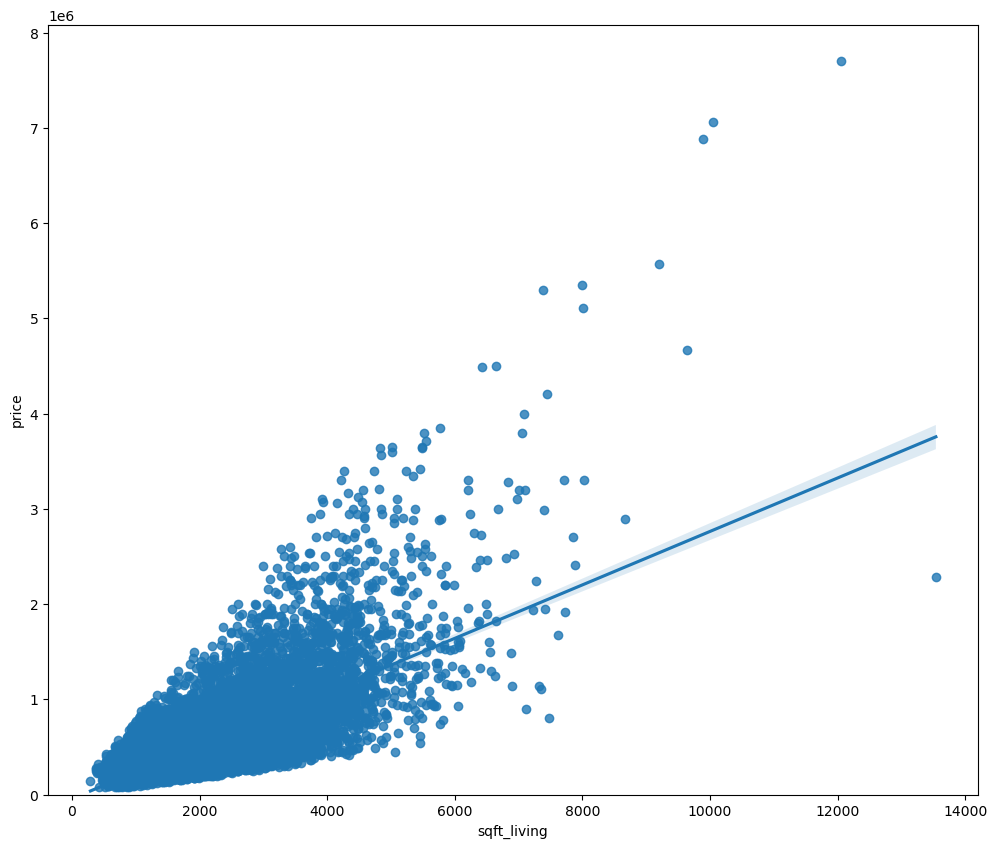

In [22]:
width = 12
height = 10
# Plot the figure
plt.figure(figsize=(width, height))
sns.regplot(x = 'sqft_living', y = 'price', data = df)
plt.ylim(0, ) # ylim is used to set the limit of the y axis
plt.show(1)


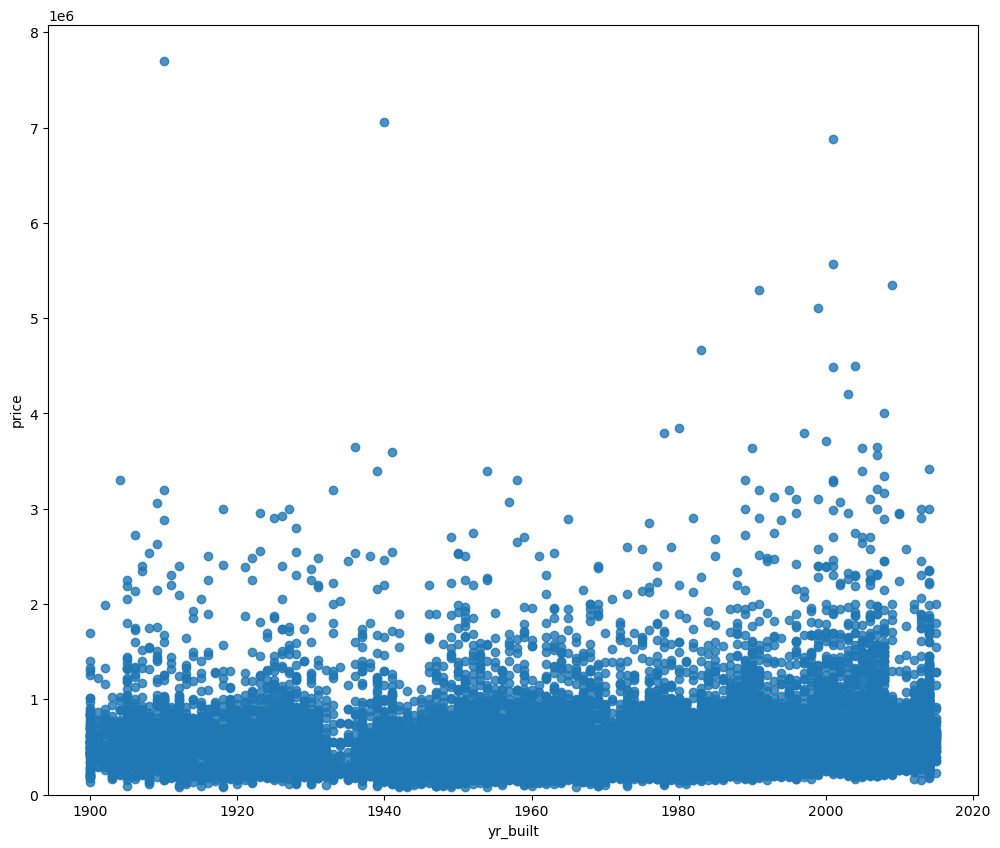

In [23]:
# Compare now versus the price
plt.figure(figsize = (width, height))
sns.regplot(x='yr_built', y = 'price', data = df)
plt.ylim(0, )
plt.show(1)

### Residual Plot
This is a good way to visualize the `variance` of the data
- `Residual` is the difference between the `observed value (y)` and the `predicted value (Y-hat)`


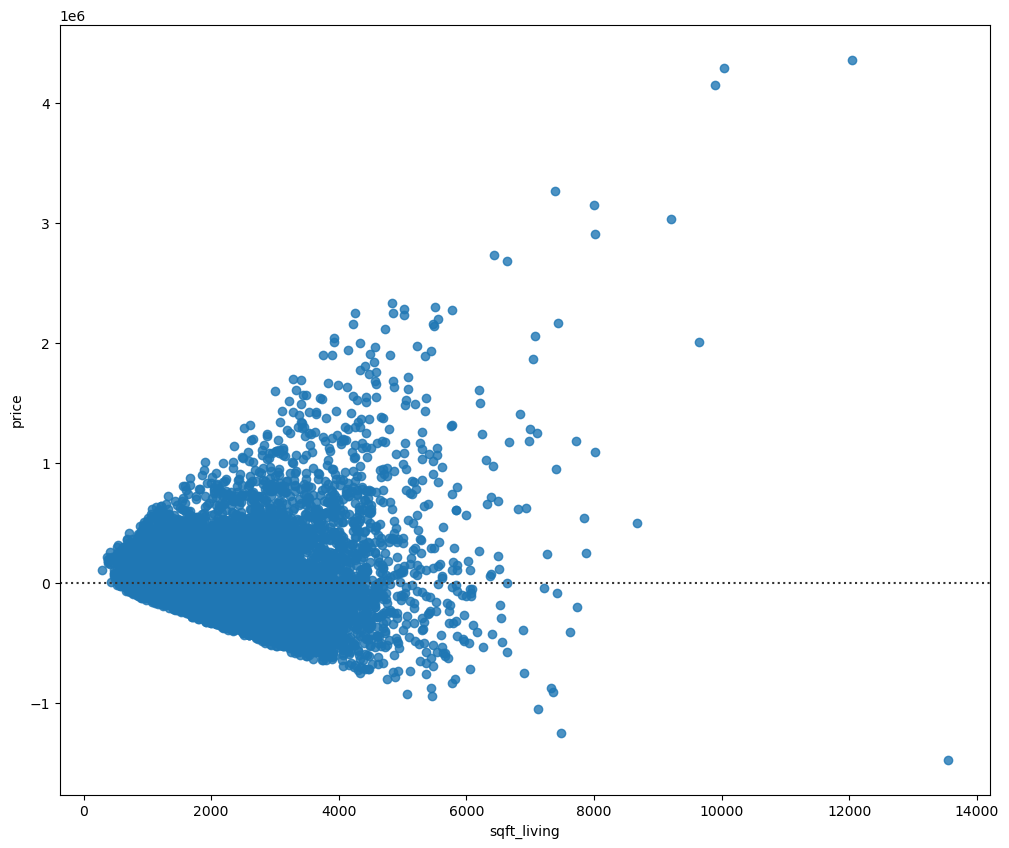

In [24]:
plt.figure (figsize=(12,10))
sns.residplot(x = df['sqft_living'], y = df['price'])
plt.show(1)

### Multiple Linear Regression Model Visualization
 

In [25]:
# Make our prediction
# Get all the predictor variables
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]  # 2D
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
Yhat = lm.predict(X)

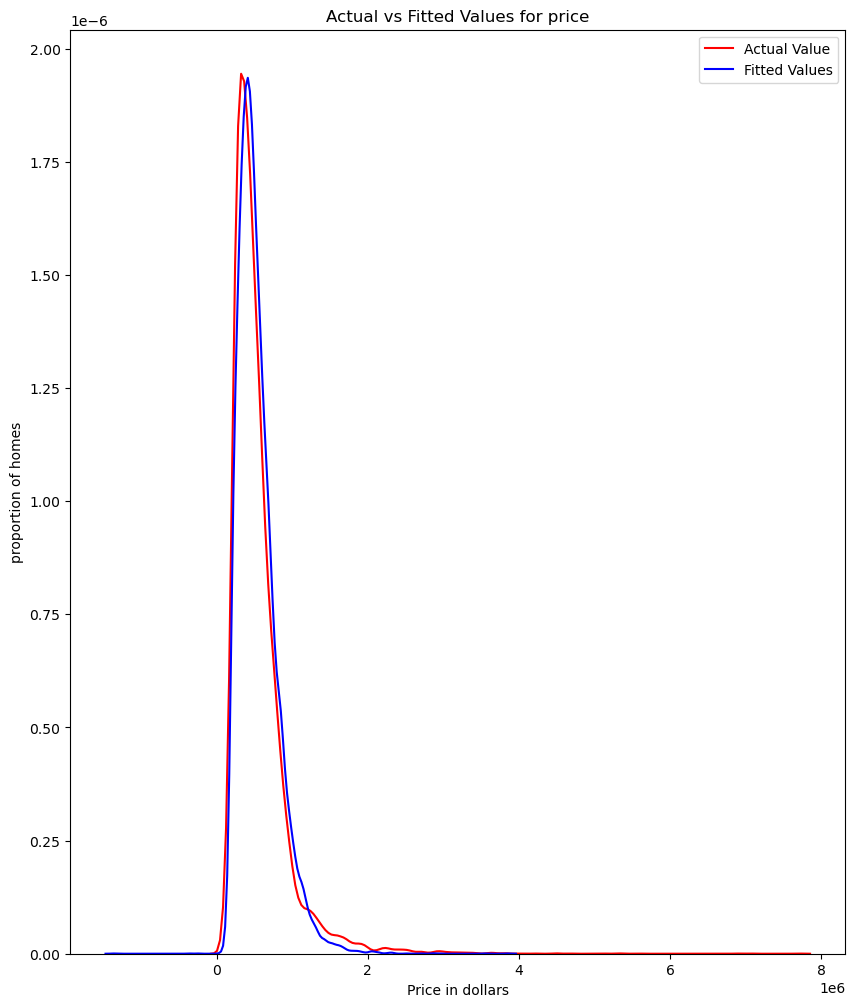

In [26]:
plt.figure(figsize=(10,12))
ax1 = sns.kdeplot(df['price'], color='r', label = 'Actual Value')
sns.kdeplot(Yhat, color='b', label = 'Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for price')
plt.xlabel('Price in dollars')
plt.ylabel('proportion of homes')
plt.legend()
plt.show(1)

In [27]:
def PlotPolly(model, independent_variable, dependent_variable, name):
    x_new = np.linspace(15, 55, 100) # linspace for x axis
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with MatPlotLib for price ~ length')
    ax = plt.gca() # Gets current axises
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf() # get the current figure
    plt.xlabel(name)
    plt.ylabel('Price of Homes')
    plt.show()
    plt.close()

In [28]:
x = df['sqft_living']
y = df['price']

In [31]:
# Fit the polynomial (3rd orrder, cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3           2
-3.841e-06 x + 0.08705 x - 90.18 x + 3.368e+05


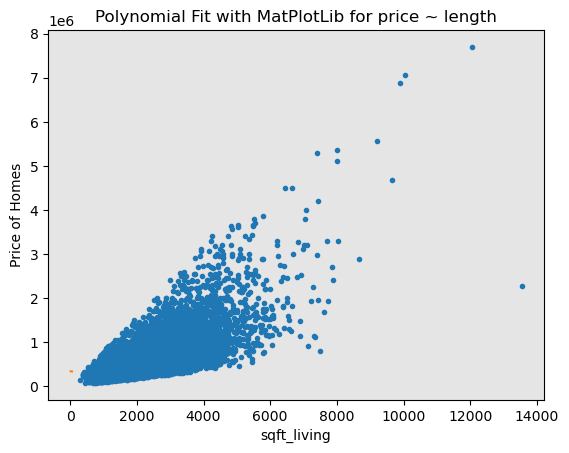

In [34]:
# Plot function
PlotPolly(p, x, y, 'sqft_living')

### Measures for In-sample Evaluations

You need to do a quantitative measure to determine how accurate your model is. There are two measurements we do:
- $R^2$: Coefficient of determination (how close it is to the fitted regression line)
- $Mean Square Error (MSE)$: Measures the average of the square errors

#### Model 1: Simple Linear Regression

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load data
df = pd.read_csv('../data/kc_house_data.csv')

X = df[['sqft_living']]
Y = df['price']
Z = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']] 

# Calculate our R^2
lm.fit(X,Y)
# Find the R^2
print(f'The R^2 is: {lm.score(X,Y)}')

The R^2 is: 0.4928532179037931


In [45]:
# Calculate the MSE
Yhat = lm.predict(X)
print(f'The output of the first four predicted values is {Yhat[0:4]}')

The output of the first four predicted values is [287555.06702452 677621.82640197 172499.40418656 506441.44998452]


In [46]:
from sklearn.metrics import mean_squared_error
# Compare it to the prediction
mse = mean_squared_error(df['price'], Yhat)
print(f'The MSE of prices is {mse}')


The MSE of prices is 68351286833.039825


In [50]:
# Multiple linear regression

lm.fit(Z, df['price'])
print(f'R^2 is {lm.score(Z, df['price'])}')

R^2 is 0.5086633263098967


In [52]:
# Get prediction of the multifit
Y_predict_multifit = lm.predict(Z)
# Compare the predicted result with the actual result
print(f'The MSE of price predicted value using multifit is: {mean_squared_error(df['price'], Y_predict_multifit)}')

The MSE of price predicted value using multifit is: 66220461413.89708


### Model 3: Polynomial Fit

In [ ]:
from sklearn.metrics import r2_score

X1 = df['sqft_living'] # 1D
Y1 = df['price']

f = np.polyfit(X, Y, 3) # Get polyfit
p = np.poly1d(f)

r_square = r2_score(Y, p(X))
print(f'The R-Square value is {r_square}')

The R-Square value is 0.5390045510503199


## Prediction and Decision Making

In the previous example we trained the model using the method `fit`. Now, we will use the method predict to get a prediction

In [ ]:
# Create a new input
new_input = np.arange(500, 5000, 1).reshape(-1, 1) # Low and high sqft
# Fit the model
lm.fit(X, Y)

LinearRegression()

In [66]:
yhat = lm.predict(new_input)
yhat[0:5]

c:\Users\mmech\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([96731.04085425, 97011.66442215, 97292.28799005, 97572.91155794,
       97853.53512584])

### Decision Making: What is a Good Model Fit?

- What is a good $R^{2}$ value?
    - The model with a `high` $R^{2}$ value is better fit
- What is a good $MSE$ value?
    - The model with the `smallest` $MSE$ is a better fit